# Building a model

From the description of the dataset: 

The column, class, lists a binary classification for each stock: -

- For each stock, if the Price Var[%] is positive, class would be 1. From a trading perspective, 1 identifies the stocks that a hypothetical trader should BUY at the start if the year and sell at the end of the year to make a profit.

- For each stock, if the Price Var[%] is negative, class would be 0. From a trading perspective, 0 identifies the stocks that a hypothetical trader should NOT BUY, since their value will decrease, meaning a loss of capital


As such, we will be looking into training a machine learning model (utilizing the class column) so that it learns to classify those stocks that are buy-worthy and not buy-worthy.

The first of such model we will be looking at is a Multi-Variate Classification tree. 

Utilizing the factors that we have identified in our EDA, we will attempt create a model to reliably classify the different stocks into either class 0 or 1. 

This will allow us to reliably predict if a stock is worth buying at the start of the year and holding on to it until the end of the year, where one can sell it for profit.

## Multi-variate Classification Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('2014_After_EDA.txt')
df

,Revenue,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Class
0,5.727000e+09,0.066,0.2041,6.706,634100000.0,1
1,4.551600e+09,-0.021,-0.1154,2.211,536500000.0,1
2,2.464867e+09,0.196,0.3189,3.020,597491000.0,1
3,3.297600e+09,0.126,0.1969,7.779,540300000.0,1
4,5.973810e+08,0.122,0.1289,10.909,111582000.0,1
...,...,...,...,...,...,...
1516,1.185080e+08,0.034,0.1324,4.249,7612000.0,0
1517,4.952987e+07,-0.002,-0.0097,4.505,523987.0,1
1518,1.532400e+08,0.085,0.3646,2.426,-1587000.0,0
1519,3.407580e+08,0.017,0.1456,8.489,5745000.0,1


In [3]:
y = pd.DataFrame(df["Class"])

predictors = pd.DataFrame(df[["Revenue", "Profit Margin", "returnOnEquity", "Book Value per Share", 
                                 "Operating Cash Flow"]])
X = predictors

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.609375
True Postitive Rate 		: 0.7063903281519862
True Negative Rate 		: 0.521193092621664
False Negative Rate 		: 0.29360967184801384
False Postitive Rate 		: 0.478806907378336

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5606557377049181
True Postitive Rate 		: 0.6285714285714286
True Negative Rate 		: 0.503030303030303
False Negative Rate 		: 0.37142857142857144
False Postitive Rate 		: 0.49696969696969695



<AxesSubplot:>

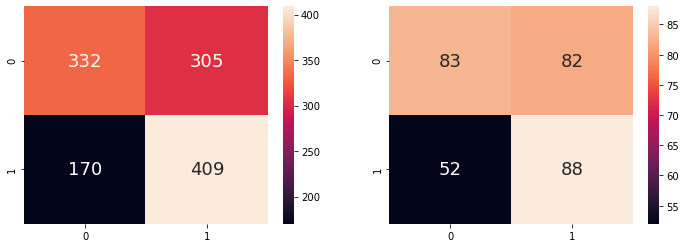

In [29]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(334.8, 543.6, 'Profit Margin <= 0.101\ngini = 0.5\nsamples = 1216\nvalue = [624, 592]\nclass = 0'),
 Text(167.4, 326.16, 'Profit Margin <= 0.051\ngini = 0.483\nsamples = 846\nvalue = [502, 344]\nclass = 0'),
 Text(83.7, 108.72000000000003, 'gini = 0.46\nsamples = 529\nvalue = [339, 190]\nclass = 0'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.5\nsamples = 317\nvalue = [163, 154]\nclass = 0'),
 Text(502.20000000000005, 326.16, 'returnOnEquity <= 0.16\ngini = 0.442\nsamples = 370\nvalue = [122, 248]\nclass = 1'),
 Text(418.5, 108.72000000000003, 'gini = 0.383\nsamples = 291\nvalue = [75, 216]\nclass = 1'),
 Text(585.9, 108.72000000000003, 'gini = 0.482\nsamples = 79\nvalue = [47, 32]\nclass = 0')]

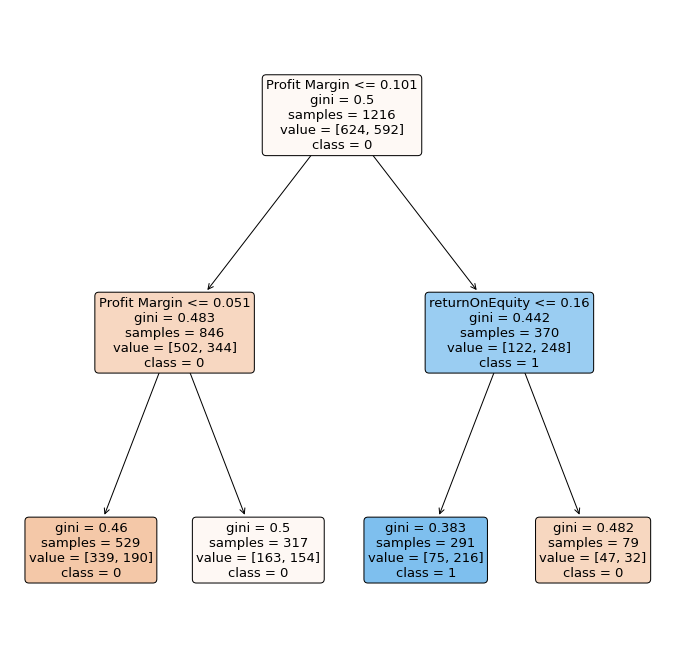

In [5]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

The model with a depth of 2 has a Classification Accuracy of 0.60 for the train set and 0.56 for the test set.

Looking to improve the Classification accuracy for the test set, we looked into increasing the depth of the classification tree.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6587171052631579
True Postitive Rate 		: 0.5594405594405595
True Negative Rate 		: 0.7468944099378882
False Negative Rate 		: 0.4405594405594406
False Postitive Rate 		: 0.2531055900621118

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5672131147540984
True Postitive Rate 		: 0.4897959183673469
True Negative Rate 		: 0.6392405063291139
False Negative Rate 		: 0.5102040816326531
False Postitive Rate 		: 0.36075949367088606



<AxesSubplot:>

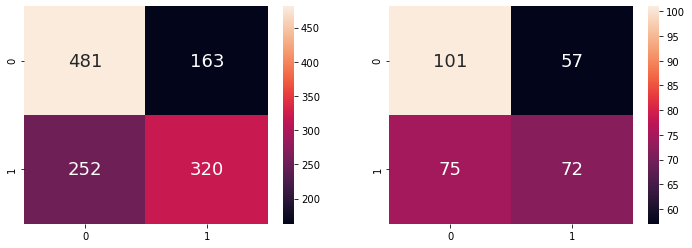

In [6]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(327.5217391304348, 587.0880000000001, 'Profit Margin <= 0.051\ngini = 0.498\nsamples = 1216\nvalue = [644, 572]\nclass = 0'),
 Text(145.56521739130434, 456.624, 'Operating Cash Flow <= -22165000.0\ngini = 0.452\nsamples = 532\nvalue = [348, 184]\nclass = 0'),
 Text(87.33913043478262, 326.1600000000001, 'Operating Cash Flow <= -55641000.0\ngini = 0.475\nsamples = 18\nvalue = [7, 11]\nclass = 1'),
 Text(58.22608695652174, 195.69600000000003, 'Revenue <= 1699100032.0\ngini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = 0'),
 Text(29.11304347826087, 65.23200000000008, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = 1'),
 Text(87.33913043478262, 65.23200000000008, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(116.45217391304348, 195.69600000000003, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = 1'),
 Text(203.7913043478261, 326.1600000000001, 'Revenue <= 4609000.0\ngini = 0.447\nsamples = 514\nvalue = [341, 173]\nclass = 0'),
 Text(174.67826086956524, 195.69600000

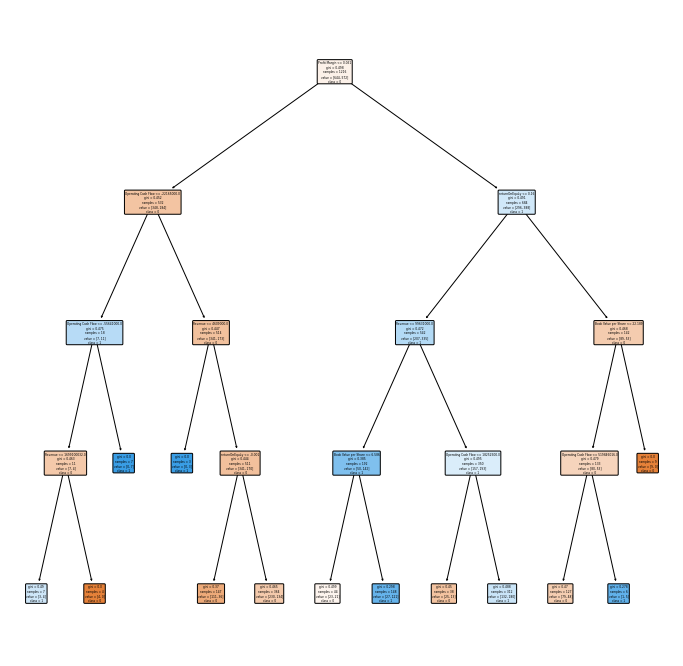

In [7]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

The model with a depth of 4 has a classification accuracy of 0.65 for the train dataset and 0.56 for the test dataset. 

Compared to the previous model with a depth of 2, it has approximately the classification accuracy for the test set but higher classification accuracy for the train set. 

Looking to improve our model and get better classification accuracy, we looked into another machine learning model: Random Forest Classification. 

## Random Forest

In [110]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

<ipython-input-117-7bc6f316b3bf>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6815789473684211
True Postitive Rate 		: 0.5753176043557169
True Negative Rate 		: 0.7809847198641766
False Negative Rate 		: 0.4246823956442831
False Postitive Rate 		: 0.21901528013582344

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6062992125984252
True Postitive Rate 		: 0.5059523809523809
True Negative Rate 		: 0.6854460093896714
False Negative Rate 		: 0.49404761904761907
False Postitive Rate 		: 0.3145539906103286



<AxesSubplot:>

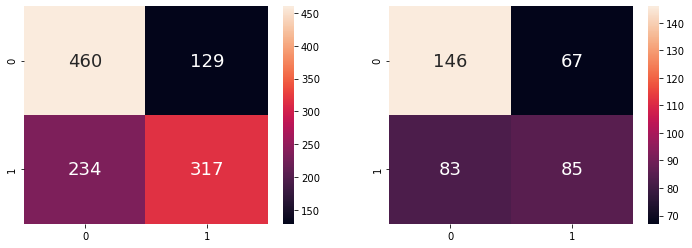

In [117]:
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 2)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model of approximately 100 trees of depth 2, we managed to obtain a classification accuracy of approximately 0.68 for the training data set and a classification accuracy of approximately 0.60 for the test data set with a true positive rate of 0.50 and true negative rate of 0.68. 

Looking to refine the classification accuracy, we looked into changing the n-estimators and depth of the tree.

<ipython-input-122-be62f3f3c777>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6912280701754386
True Postitive Rate 		: 0.5619223659889094
True Negative Rate 		: 0.8080133555926544
False Negative Rate 		: 0.43807763401109057
False Postitive Rate 		: 0.19198664440734559

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6141732283464567
True Postitive Rate 		: 0.47191011235955055
True Negative Rate 		: 0.7389162561576355
False Negative Rate 		: 0.5280898876404494
False Postitive Rate 		: 0.26108374384236455



<AxesSubplot:>

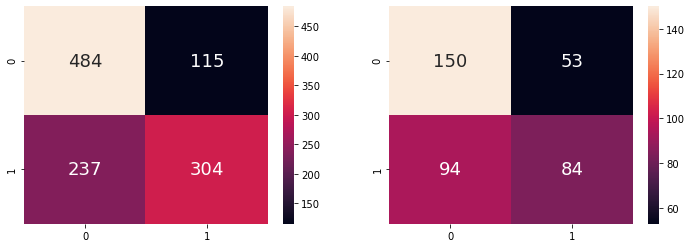

In [122]:
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model of approximately 500 trees of depth 4, we managed to obtain a classification accuracy of approximately 0.69 for the training data set and a classification accuracy of approximately 0.61 for the test data set.

There is a slight improvement in the model of depth 4 due to its higher classification accuracy for both the train and test data sets.

When comparing the random forest model and the multivariate classification tree model, we can see that there is an increase in the classification accuracy for both the train(0.69-r.forest vs 0.63-c.tree) and test data sets(0.61-r.forest vs 0.59-c.tree).

Seeking to refine our random forest model, we decided to look into GridSearch to help us hypertune our parameters such that our model would be more accurate.

## Hypertuning with GridSearchCV

In [123]:
# Import GridSearchCV from Scikit-Learn
from sklearn.model_selection import GridSearchCV

In [128]:
# Create the param grid
param_grid = {#tests random forest models of 100-500 trees
              'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 100)], 
              
              #Uses Gini index as classifier
              'criterion' : ['gini'],
    
              #Decides how to split the tree
              'max_features': ['auto', 'sqrt'],
    
              #range of depth of each tree
              'max_depth': [2,4],
    
              #The minimum number of samples required to split an internal node
              'min_samples_split': [2, 5],
    
              #The minimum number of samples required to be at a leaf node.
              'min_samples_leaf': [1, 2],
    
              'bootstrap': [True, False]}

rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [129]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   53.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 14.3min

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'max_depth': [2, 4], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 104, 108, 112, 116, 120, 124,
                                          128, 132, 136, 140, 144, 148, 152,
                                          156, 160, 164, 168, 172, 176, 180,
                                          184, 188, 192, 196, 201, 205, 209,
                                          213, 217, ...]},
             verbose=2)

In [130]:
#displays the parameters that give the best result
rf_Grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 128}

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6956140350877194
True Postitive Rate 		: 0.5693160813308688
True Negative Rate 		: 0.8096828046744574
False Negative Rate 		: 0.43068391866913125
False Postitive Rate 		: 0.19031719532554256

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6351706036745407
True Postitive Rate 		: 0.4887640449438202
True Negative Rate 		: 0.7635467980295566
False Negative Rate 		: 0.5112359550561798
False Postitive Rate 		: 0.23645320197044334



<AxesSubplot:>

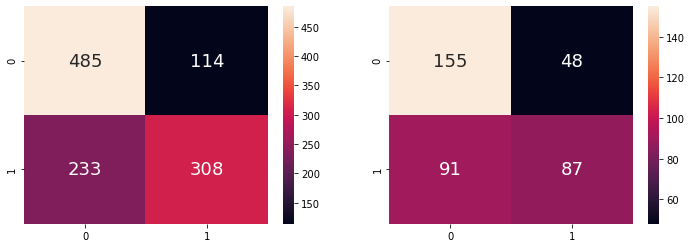

In [131]:
# Predict Response corresponding to Predictors
y_train_pred = rf_Grid.predict(X_train)
y_test_pred = rf_Grid.predict(X_test)

train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_Grid.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_Grid.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

After utilizing GridSearch Cross Validation to hyptertune the parameters, there is an improvement in the classification accuracy on the test set as compared to using a random forest. The final model gives a classification accuracy of 0.69 on the training set and 0.63 on the test set. 

In [133]:
#for saving the model
import joblib
filename = '2014_model.sav'
joblib.dump(rf_Grid, filename)

['2014_model.sav']